In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.xls')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace =True)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [ ]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11, activation ='relu', input_dim =11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation ='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8642 - loss: 0.3205 - val_accuracy: 0.8506 - val_loss: 0.3507
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8667 - loss: 0.3122 - val_accuracy: 0.8519 - val_loss: 0.3499
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8776 - loss: 0.2995 - val_accuracy: 0.8525 - val_loss: 0.3496
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.3162 - val_accuracy: 0.8531 - val_loss: 0.3497
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8620 - loss: 0.3245 - val_accuracy: 0.8500 - val_loss: 0.3510
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8658 - loss: 0.3194 - val_accuracy: 0.8519 - val_loss: 0.3507
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8718 - loss: 0.3152 - val_accuracy: 0.8537 - val_loss: 0.3503
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3188 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[ 0.08228171,  0.00939475,  0.05940888, -0.07987312, -0.18709835,
          0.34711394, -0.25725168,  0.02999768,  0.01756617, -0.131519  ,
          0.15057124],
        [ 0.05178325,  0.48241526,  0.71109277,  0.6095956 , -0.41013464,
          0.18346857, -0.53958374, -0.49858412, -0.4413346 ,  1.3614573 ,
         -0.3565946 ],
        [ 0.23231784,  0.17009728,  0.15231872, -0.00217369, -0.16486534,
          0.14103521, -0.1929388 , -0.15281746, -0.00992989, -0.14815533,
         -0.11298966],
        [-0.3343481 , -0.66457915, -0.32655963, -0.01056986,  0.4302476 ,
         -0.5277928 , -1.1837329 ,  0.26585665, -0.21195866,  0.02437771,
          0.1562593 ],
        [-0.08478957, -0.68121606, -0.27279243,  1.0151062 , -0.26787737,
         -0.55483866,  0.02478291,  0.09616714,  0.9236254 , -0.18929677,
         -0.34469235],
        [ 0.38340235, -0.29641074, -0.0148628 ,  0.11655374,  0.4608542 ,
         -0.35981435, -0.17390823, -0.3688538 , -0.07305074,  0.0014301

In [ ]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = np.where(y_log > 0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.855

In [ ]:
history.history

{'accuracy': [0.8681250214576721,
  0.8675000071525574,
  0.8685937523841858,
  0.8682812452316284,
  0.8676562309265137,
  0.8693749904632568,
  0.8692187666893005,
  0.8692187666893005,
  0.8676562309265137,
  0.8673437237739563,
  0.867968738079071,
  0.8687499761581421,
  0.8690624833106995,
  0.8684375286102295,
  0.8690624833106995,
  0.8668749928474426,
  0.8684375286102295,
  0.8676562309265137,
  0.8689062595367432,
  0.867968738079071,
  0.8676562309265137,
  0.8690624833106995,
  0.8690624833106995,
  0.8678125143051147,
  0.8673437237739563,
  0.8685937523841858,
  0.8687499761581421,
  0.8689062595367432,
  0.8687499761581421,
  0.8676562309265137,
  0.8682812452316284,
  0.8684375286102295,
  0.8687499761581421,
  0.8685937523841858,
  0.8701562285423279,
  0.8684375286102295,
  0.8682812452316284,
  0.8685937523841858,
  0.8685937523841858,
  0.8682812452316284,
  0.8687499761581421,
  0.8690624833106995,
  0.8687499761581421,
  0.8675000071525574,
  0.8707812428474426,


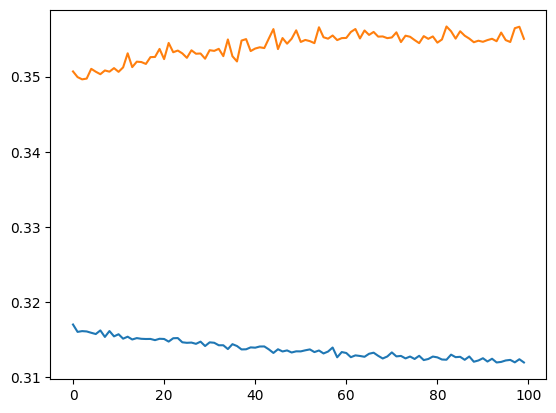

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

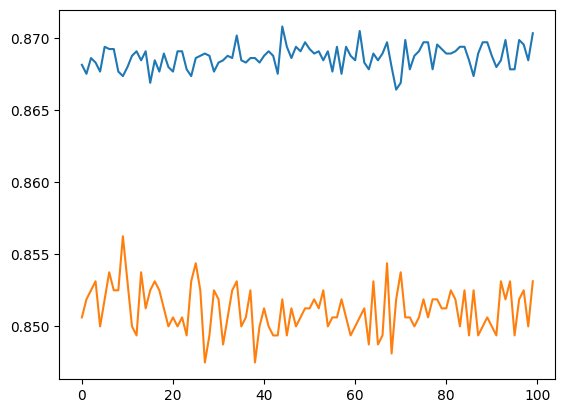

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])